In [ ]:
import yaml
import pandas as pd
import os
import glob

def yaml_folder_to_csv(folder_path, output_file="combined.csv"):
    # Find all YAML files in the folder
    yaml_files = glob.glob(os.path.join(folder_path, "*.yaml"))

    if not yaml_files:
        print("⚠️ No YAML files found in the folder!")
        return

    dataframes = []

    for file in yaml_files:
        with open(file, "r") as f:
            data = yaml.safe_load(f)

        # Convert YAML dict/list into DataFrame
        df = pd.json_normalize(data)
        dataframes.append(df)

    # Combine all YAML data into one DataFrame
    final_df = pd.concat(dataframes, ignore_index=True)

    # Save as CSV
    final_df.to_csv(output_file, index=False)
    print(f"✅ CSV file created: {output_file}")
    print(f"📂 Files merged: {len(yaml_files)}")

# Example usage
folder_path = r"C:\Users\msiva\OneDrive\Desktop\siva\New Project\data\data\2024-11"   # 🔹 replace with your folder path
yaml_folder_to_csv(folder_path, "combined12.csv")

✅ CSV file created: combined12.csv
📂 Files merged: 14


In [1]:
import pandas as pd
import os

# List your specific CSV files
csv_files = ['combined.csv', 'combined1.csv', 'combined2.csv', 'combined3.csv', 'combined4.csv',
             'combined5.csv', 'combined6.csv', 'combined7.csv', 'combined8.csv', 'combined9.csv',
             'combined10.csv', 'combined11.csv', 'combined12.csv']

# Check if files exist
existing_files = [f for f in csv_files if os.path.exists(f)]

# Concatenate files
df = pd.concat([pd.read_csv(f) for f in existing_files], ignore_index=True)

# Save combined file
df.to_csv('combined_all_files.csv', index=False)
print(f"Successfully combined {len(existing_files)} files!")

Successfully combined 13 files!


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('combined_all_files.csv')

# Get unique ticker names
ticker_names = df['Ticker'].unique()

# Create a separate CSV file for each ticker
for ticker in ticker_names:
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]
    
    # Save to CSV file with ticker name
    filename = f"{ticker}_data.csv"
    ticker_data.to_csv(filename, index=False)
    print(f"Saved {filename} with {len(ticker_data)} rows")

print(f"\nProcess completed. Created {len(ticker_names)} separate CSV files.")

Saved SBIN_data.csv with 264 rows
Saved BAJFINANCE_data.csv with 264 rows
Saved TITAN_data.csv with 264 rows
Saved ITC_data.csv with 264 rows
Saved TCS_data.csv with 264 rows
Saved LT_data.csv with 264 rows
Saved TATACONSUM_data.csv with 264 rows
Saved RELIANCE_data.csv with 264 rows
Saved HCLTECH_data.csv with 264 rows
Saved JSWSTEEL_data.csv with 264 rows
Saved ULTRACEMCO_data.csv with 264 rows
Saved POWERGRID_data.csv with 264 rows
Saved INFY_data.csv with 264 rows
Saved TRENT_data.csv with 264 rows
Saved BHARTIARTL_data.csv with 264 rows
Saved TATAMOTORS_data.csv with 264 rows
Saved WIPRO_data.csv with 264 rows
Saved TECHM_data.csv with 264 rows
Saved NTPC_data.csv with 264 rows
Saved HINDUNILVR_data.csv with 264 rows
Saved APOLLOHOSP_data.csv with 264 rows
Saved M&M_data.csv with 264 rows
Saved GRASIM_data.csv with 264 rows
Saved ICICIBANK_data.csv with 264 rows
Saved ADANIENT_data.csv with 264 rows
Saved ADANIPORTS_data.csv with 264 rows
Saved BEL_data.csv with 264 rows
Saved BAJ

In [ ]:
# import pandas as pd
# from datetime import datetime

# # Read the CSV file
# df = pd.read_csv('combined_all_files.csv')

# # Convert the Date column to datetime format (handling the time format)
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H.%M', errors='coerce')

# # If the above format doesn't work, try this alternative approach:
# # df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# # Separate Date and Time into different columns
# df['Date_Only'] = df['Date'].dt.date
# df['Time_Only'] = df['Date'].dt.time

# # Get unique ticker names
# ticker_names = df['Ticker'].unique()

# # Create a separate CSV file for each ticker with separated date and time
# for ticker in ticker_names:
#     # Filter data for the current ticker
#     ticker_data = df[df['Ticker'] == ticker].copy()
    
#     # Save to CSV file with ticker name
#     filename = f"{ticker}_data.csv"
#     ticker_data.to_csv(filename, index=False)
#     print(f"Saved {filename} with {len(ticker_data)} rows")

# print(f"\nProcess completed. Created {len(ticker_names)} separate CSV files.")

# # If you want to separate files based on date (previous vs current)
# # For example, separate files before and after a specific date
# print("\nSeparating files by date categories...")

# # Define what you consider "previous" (adjust the date as needed)
# cutoff_date = pd.to_datetime('2023-01-01').date()  # Example cutoff date

# for ticker in ticker_names:
#     # Filter data for the current ticker
#     ticker_data = df[df['Ticker'] == ticker].copy()
    
#     # Separate into previous and current data
#     previous_data = ticker_data[ticker_data['Date_Only'] < cutoff_date]
#     current_data = ticker_data[ticker_data['Date_Only'] >= cutoff_date]
    
#     # Save previous data
#     if len(previous_data) > 0:
#         prev_filename = f"{ticker}_previous_data.csv"
#         previous_data.to_csv(prev_filename, index=False)
#         print(f"Saved {prev_filename} with {len(previous_data)} rows")
    
#     # Save current data
#     if len(current_data) > 0:
#         curr_filename = f"{ticker}_current_data.csv"
#         current_data.to_csv(curr_filename, index=False)
#         print(f"Saved {curr_filename} with {len(current_data)} rows")

# print("\nAll files separated successfully!")

In [ ]:
import pandas as pd
import os
from datetime import datetime

def analyze_stock_data(file_paths):
    """
    Analyze multiple stock CSV files and calculate required metrics
    """
    stock_data = {}
    
    for file_path in file_paths:
        # Extract ticker name from filename
        ticker = os.path.basename(file_path).split('_')[0]
        
        # Read and process the data
        df = pd.read_csv(file_path)
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
        
        # Sort by date and calculate yearly return
        df = df.sort_values('date')
        start_price = df.iloc[0]['close']
        end_price = df.iloc[-1]['close']
        yearly_return = ((end_price - start_price) / start_price) * 100
        
        # Calculate average price and volume
        avg_price = df['close'].mean()
        avg_volume = df['volume'].mean()
        
        stock_data[ticker] = {
            'yearly_return': yearly_return,
            'start_price': start_price,
            'end_price': end_price,
            'avg_price': avg_price,
            'avg_volume': avg_volume,
            'trend': 'Green' if yearly_return > 0 else 'Red'
        }
    
    return stock_data

def generate_summary(stock_data):
    """
    Generate the required summary from stock data
    """
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame.from_dict(stock_data, orient='index')
    
    # Top 10 Green Stocks (highest positive returns)
    top_10_green = df[df['yearly_return'] > 0].nlargest(10, 'yearly_return')
    
    # Top 10 Loss Stocks (lowest returns)
    top_10_loss = df.nsmallest(10, 'yearly_return')
    
    # Market Summary
    green_count = (df['trend'] == 'Green').sum()
    red_count = (df['trend'] == 'Red').sum()
    avg_price_all = df['avg_price'].mean()
    avg_volume_all = df['avg_volume'].mean()
    
    return {
        'top_10_green': top_10_green,
        'top_10_loss': top_10_loss,
        'market_summary': {
            'green_stocks': green_count,
            'red_stocks': red_count,
            'total_stocks': len(df),
            'avg_price': avg_price_all,
            'avg_volume': avg_volume_all
        }
    }

# Example usage with your provided files
file_paths = [
    'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
    
    
    
    
    # Add your 50+ other file paths here
]

# Analyze the data
stock_data = analyze_stock_data(file_paths)
summary = generate_summary(stock_data)

# Display results
print("=== TOP 10 GREEN STOCKS ===")
print(summary['top_10_green'][['yearly_return', 'start_price', 'end_price']])
print("\n")

print("=== TOP 10 LOSS STOCKS ===")
print(summary['top_10_loss'][['yearly_return', 'start_price', 'end_price']])
print("\n")

print("=== MARKET SUMMARY ===")
market = summary['market_summary']
print(f"Green Stocks: {market['green_stocks']}")
print(f"Red Stocks: {market['red_stocks']}")
print(f"Total Stocks: {market['total_stocks']}")
print(f"Average Price Across All Stocks: {market['avg_price']:,.2f}")
print(f"Average Volume Across All Stocks: {market['avg_volume']:,.2f}")

=== TOP 10 GREEN STOCKS ===
            yearly_return  start_price  end_price
TRENT          202.723364      2197.65    6652.80
BEL            112.122356       132.40     280.85
M&M            107.132545      1454.60    3012.95
BAJAJ-AUTO      77.414466      5344.35    9481.65
BHARTIARTL      71.799223       913.45    1569.30
POWERGRID       67.678527       200.95     336.95
SUNPHARMA       60.840351      1116.20    1795.30
BPCL            60.184926       178.45     285.85
NTPC            57.115219       232.60     365.45
TECHM           55.315083      1125.10    1747.45


=== TOP 10 LOSS STOCKS ===
            yearly_return  start_price  end_price
INDUSINDBK     -30.322491      1432.60     998.20
ASIANPAINT     -15.755397      2934.55    2472.20
BAJFINANCE     -10.545511      7471.90    6683.95
NESTLEIND       -5.863183      2387.27    2247.30
HINDUNILVR      -1.092123      2472.25    2445.25
ADANIENT         0.482569      2217.30    2228.00
BAJAJFINSV       1.780208      1572.85    1

Matplotlib is building the font cache; this may take a moment.


=== VOLATILITY ANALYSIS REPORT ===
Total Stocks Analyzed: 50

Overall Market Volatility Statistics:
Average Volatility: 1.68%
Maximum Volatility: 2.92%
Minimum Volatility: 1.17%

=== TOP 10 MOST VOLATILE STOCKS ===
1. ADANIENT:
   Volatility: 2.92%
   Avg Daily Return: 0.05%
   Max Daily Gain: 16.91%
   Max Daily Loss: -22.61%
   Trading Days: 263.0

2. ADANIPORTS:
   Volatility: 2.66%
   Avg Daily Return: 0.19%
   Max Daily Gain: 15.30%
   Max Daily Loss: -21.15%
   Trading Days: 263.0

3. BEL:
   Volatility: 2.38%
   Avg Daily Return: 0.32%
   Max Daily Gain: 7.67%
   Max Daily Loss: -19.80%
   Trading Days: 263.0

4. TRENT:
   Volatility: 2.35%
   Avg Daily Return: 0.45%
   Max Daily Gain: 18.86%
   Max Daily Loss: -6.47%
   Trading Days: 263.0

5. ONGC:
   Volatility: 2.29%
   Avg Daily Return: 0.13%
   Max Daily Gain: 7.88%
   Max Daily Loss: -16.83%
   Trading Days: 263.0

6. BPCL:
   Volatility: 2.25%
   Avg Daily Return: 0.20%
   Max Daily Gain: 9.81%
   Max Daily Loss: -12.90%

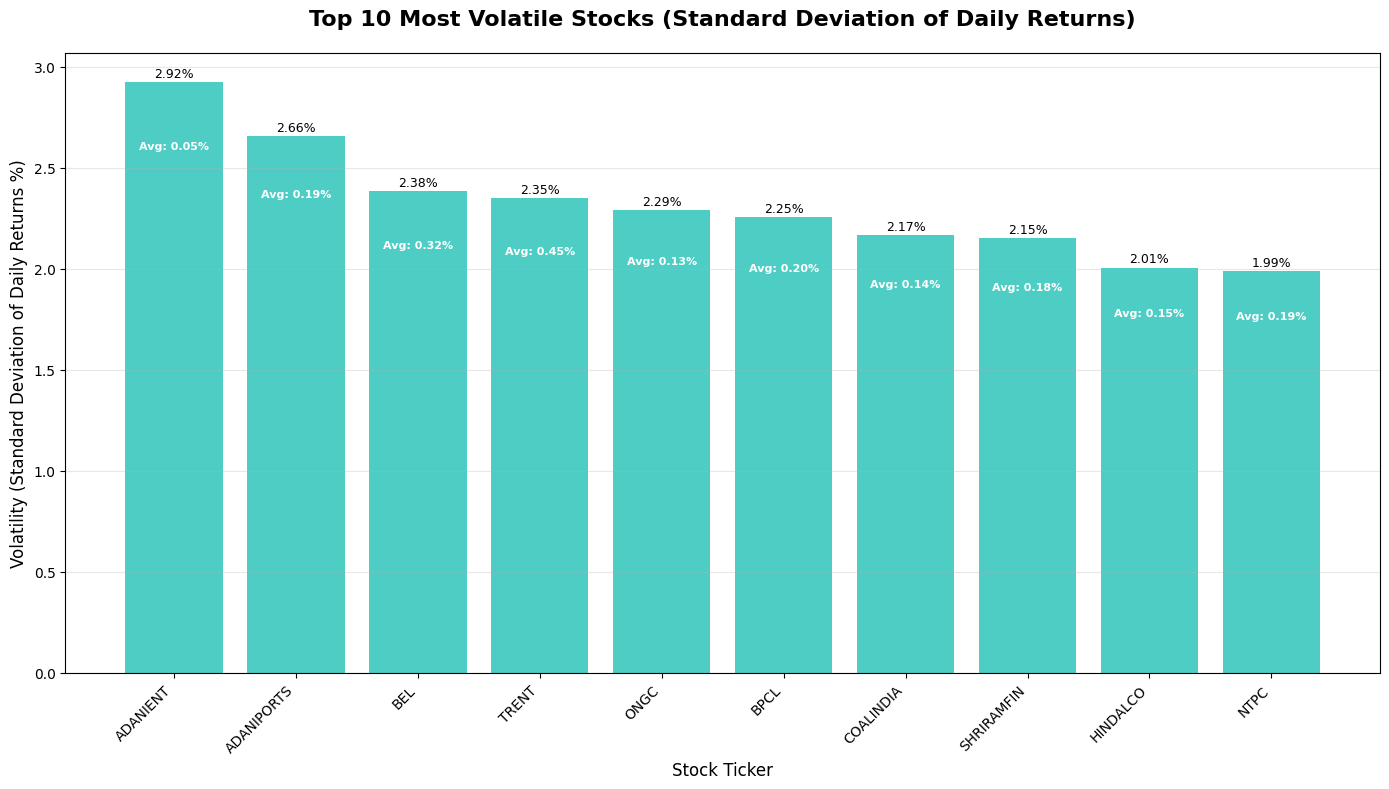

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def analyze_stock_volatility(file_paths):
    """
    Analyze volatility of multiple stock CSV files
    """
    volatility_data = {}
    daily_returns_data = {}
    
    for file_path in file_paths:
        try:
            # Extract ticker name from filename
            ticker = os.path.basename(file_path).split('_')[0]
            
            # Read and process the data
            df = pd.read_csv(file_path)
            df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
            df = df.sort_values('date')
            
            # Calculate daily returns
            df['daily_return'] = df['close'].pct_change() * 100  # Percentage returns
            
            # Calculate volatility (standard deviation of daily returns)
            # Remove NaN values from daily returns
            valid_returns = df['daily_return'].dropna()
            volatility = valid_returns.std()
            
            # Calculate additional volatility metrics
            avg_daily_return = valid_returns.mean()
            max_daily_gain = valid_returns.max()
            max_daily_loss = valid_returns.min()
            
            # Store data
            volatility_data[ticker] = {
                'volatility': volatility,
                'avg_daily_return': avg_daily_return,
                'max_daily_gain': max_daily_gain,
                'max_daily_loss': max_daily_loss,
                'total_trading_days': len(valid_returns)
            }
            
            daily_returns_data[ticker] = valid_returns
            
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    return volatility_data, daily_returns_data

def plot_top_volatile_stocks(volatility_data, top_n=10):
    """
    Plot bar chart of top N most volatile stocks
    """
    # Convert to DataFrame and sort by volatility
    df = pd.DataFrame.from_dict(volatility_data, orient='index')
    df = df.sort_values('volatility', ascending=False)
    
    # Select top N stocks
    top_volatile = df.head(top_n)
    
    # Create plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(top_volatile.index, top_volatile['volatility'], 
                  color=['#ff6b6b' if x < 0 else '#4ecdc4' for x in top_volatile['avg_daily_return']])
    
    # Customize plot
    plt.title(f'Top {top_n} Most Volatile Stocks (Standard Deviation of Daily Returns)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Stock Ticker', fontsize=12)
    plt.ylabel('Volatility (Standard Deviation of Daily Returns %)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
    
    # Add average return information
    for i, ticker in enumerate(top_volatile.index):
        avg_return = top_volatile.loc[ticker, 'avg_daily_return']
        plt.text(i, top_volatile.loc[ticker, 'volatility'] * 0.9, 
                f'Avg: {avg_return:.2f}%', ha='center', va='top', 
                fontsize=8, color='white', fontweight='bold')
    
    plt.tight_layout()
    return plt

def generate_volatility_report(volatility_data, top_n=10):
    """
    Generate detailed volatility report
    """
    df = pd.DataFrame.from_dict(volatility_data, orient='index')
    df = df.sort_values('volatility', ascending=False)
    
    print("=== VOLATILITY ANALYSIS REPORT ===")
    print(f"Total Stocks Analyzed: {len(df)}")
    print(f"\nOverall Market Volatility Statistics:")
    print(f"Average Volatility: {df['volatility'].mean():.2f}%")
    print(f"Maximum Volatility: {df['volatility'].max():.2f}%")
    print(f"Minimum Volatility: {df['volatility'].min():.2f}%")
    
    print(f"\n=== TOP {top_n} MOST VOLATILE STOCKS ===")
    top_volatile = df.head(top_n)
    for i, (ticker, data) in enumerate(top_volatile.iterrows(), 1):
        print(f"{i}. {ticker}:")
        print(f"   Volatility: {data['volatility']:.2f}%")
        print(f"   Avg Daily Return: {data['avg_daily_return']:.2f}%")
        print(f"   Max Daily Gain: {data['max_daily_gain']:.2f}%")
        print(f"   Max Daily Loss: {data['max_daily_loss']:.2f}%")
        print(f"   Trading Days: {data['total_trading_days']}")
        print()
    
    return df

# Example usage with your provided files
file_paths = [
    'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
    # Add your 50+ other file paths here
]

# Analyze volatility
volatility_data, daily_returns_data = analyze_stock_volatility(file_paths)

# Generate report
volatility_df = generate_volatility_report(volatility_data, top_n=10)

# Plot visualization
plt = plot_top_volatile_stocks(volatility_data, top_n=10)
plt.show()

# Additional: You can also analyze the distribution of daily returns for specific stocks
def plot_daily_returns_distribution(daily_returns_data, ticker):
    """
    Plot distribution of daily returns for a specific stock
    """
    if ticker in daily_returns_data:
        returns = daily_returns_data[ticker]
        
        plt.figure(figsize=(12, 6))
        plt.hist(returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(returns.mean(), color='red', linestyle='dashed', linewidth=2, 
                   label=f'Mean: {returns.mean():.2f}%')
        plt.axvline(returns.std(), color='orange', linestyle='dashed', linewidth=2, 
                   label=f'Std Dev: {returns.std():.2f}%')
        plt.axvline(-returns.std(), color='orange', linestyle='dashed', linewidth=2)
        
        plt.title(f'Distribution of Daily Returns - {ticker}', fontsize=14, fontweight='bold')
        plt.xlabel('Daily Return (%)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# Example: Plot distribution for a specific stock
# plot_daily_returns_distribution(daily_returns_data, 'ADANIENT')

=== CUMULATIVE RETURN REPORT ===
Total Stocks Analyzed: 50

    Ticker  Final Cumulative Return
     TRENT                 2.027234
       BEL                 1.121224
       M&M                 1.071325
BAJAJ-AUTO                 0.774145
BHARTIARTL                 0.717992


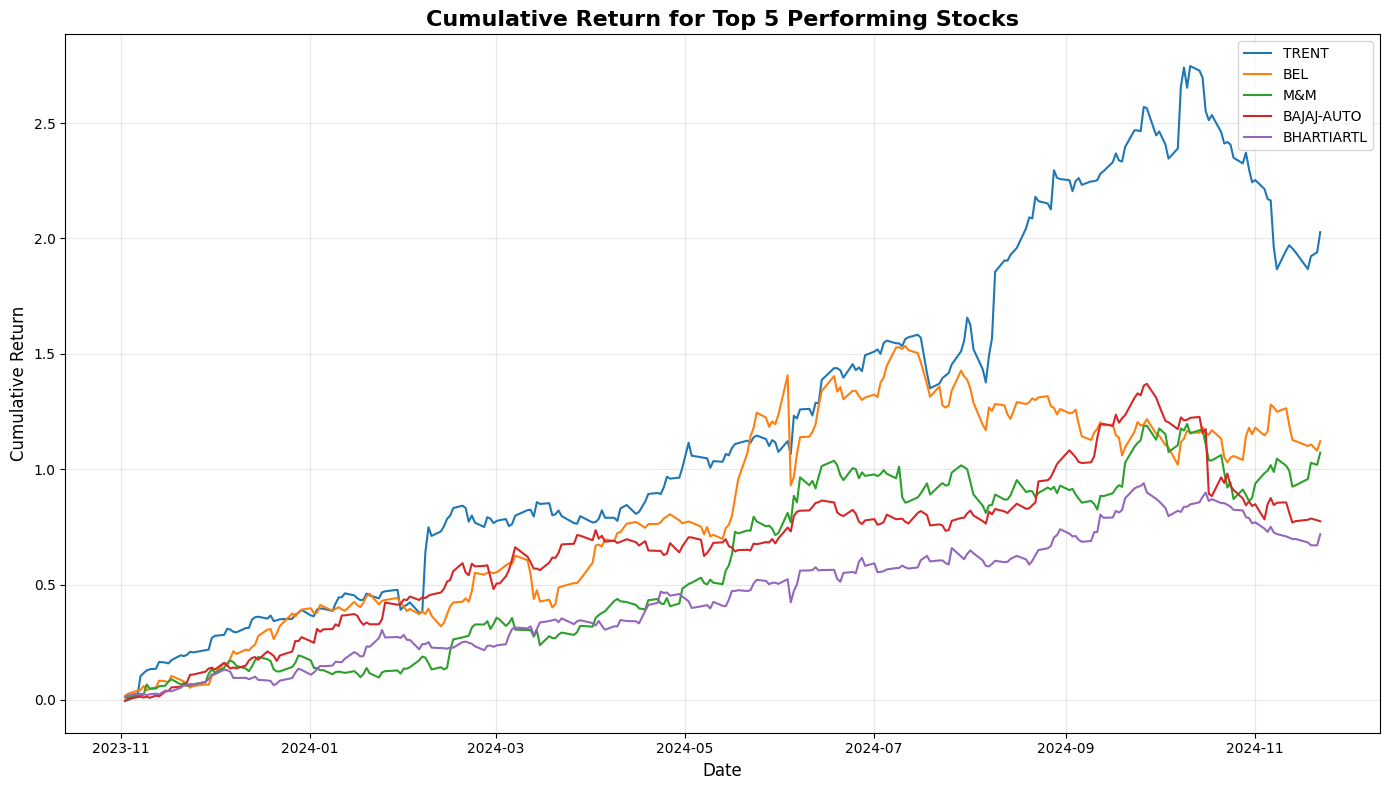

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_cumulative_returns(file_paths):
    """
    Analyze cumulative returns of multiple stock CSV files.
    """
    cumulative_data = {}
    
    for file_path in file_paths:
        try:
            # Extract ticker name
            ticker = os.path.basename(file_path).split('_')[0]
            
            # Read and process
            df = pd.read_csv(file_path)
            df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
            df = df.sort_values('date')
            
            # Daily + cumulative returns
            df['daily_return'] = df['close'].pct_change()
            df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1
            
            cumulative_data[ticker] = df[['date', 'cumulative_return']]
            
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    return cumulative_data

def plot_top_cumulative_returns(cumulative_data, top_n=5):
    """
    Plot line chart of top N performing stocks based on cumulative returns.
    """
    # Get final returns
    final_returns = {
        ticker: data['cumulative_return'].iloc[-1]
        for ticker, data in cumulative_data.items()
        if not data['cumulative_return'].empty
    }
    
    # Sort & pick top N
    top_stocks = sorted(final_returns.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Plot
    plt.figure(figsize=(14, 8))
    for ticker, _ in top_stocks:
        plt.plot(cumulative_data[ticker]['date'], 
                 cumulative_data[ticker]['cumulative_return'], 
                 label=ticker)
    
    plt.title(f"Cumulative Return for Top {top_n} Performing Stocks", fontsize=16, fontweight="bold")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Cumulative Return", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    return plt

def generate_cumulative_report(cumulative_data, top_n=5):
    """
    Generate a textual report of cumulative returns.
    """
    final_returns = {
        ticker: data['cumulative_return'].iloc[-1]
        for ticker, data in cumulative_data.items()
        if not data['cumulative_return'].empty
    }
    
    df = pd.DataFrame(list(final_returns.items()), columns=['Ticker', 'Final Cumulative Return'])
    df = df.sort_values('Final Cumulative Return', ascending=False)
    
    print("=== CUMULATIVE RETURN REPORT ===")
    print(f"Total Stocks Analyzed: {len(df)}")
    print()
    print(df.head(top_n).to_string(index=False))
    
    return df

# ============================
# Example usage
# ============================
file_paths = [
    'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
    # ... add your 50+ files
]

# Analyze
cumulative_data = analyze_cumulative_returns(file_paths)

# Report
report_df = generate_cumulative_report(cumulative_data, top_n=5)

# Plot
plt = plot_top_cumulative_returns(cumulative_data, top_n=5)
plt.show()


=== SECTOR PERFORMANCE REPORT ===
Total Sectors Analyzed: 9

AUTOMOBILES: 107.13%
RETAILING: 103.49%
POWER: 57.12%
ENERGY: 45.87%
ALUMINIUM: 40.93%
TEXTILES: 39.63%
SOFTWARE: 38.75%
PHARMACEUTICALS: 23.75%
FOOD & TOBACCO: 10.87%


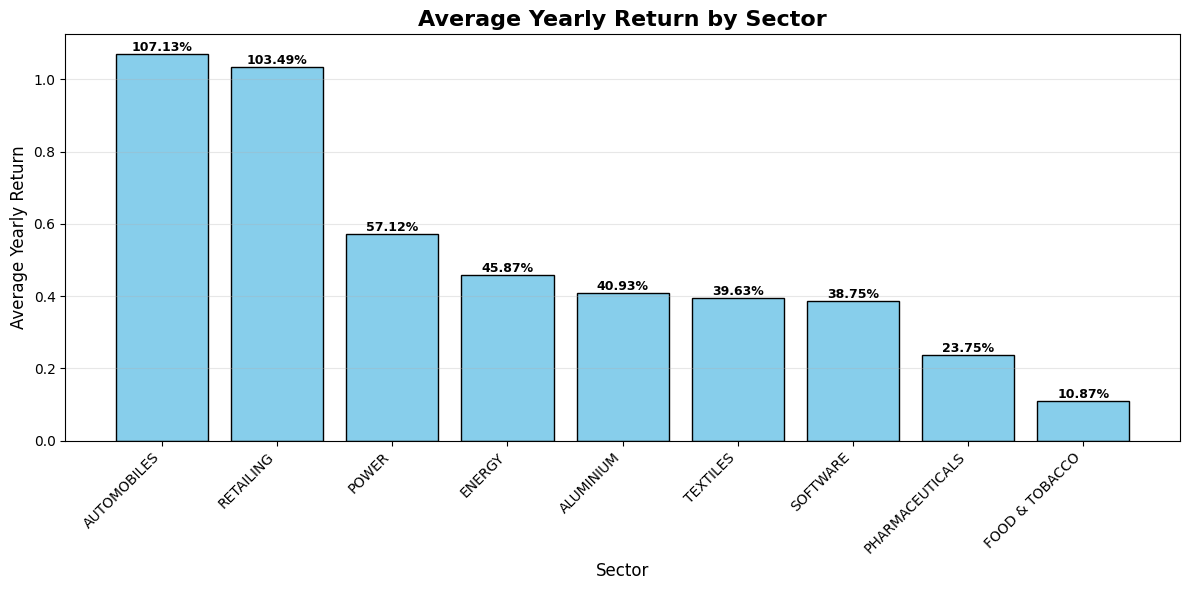

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_sector_performance(file_paths, sector_file):
    """
    Analyze sector-wise average yearly return.
    """
    # Load sector mapping
    sector_map = pd.read_csv(sector_file)
    sector_dict = dict(zip(sector_map['Ticker'], sector_map['Sector']))
    
    yearly_returns = []
    
    for file_path in file_paths:
        try:
            ticker = os.path.basename(file_path).split('_')[0]
            if ticker not in sector_dict:
                continue  # Skip if no sector info
            
            df = pd.read_csv(file_path)
            df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
            df = df.sort_values('date')
            
            # Calculate cumulative yearly return
            if 'close' in df.columns:
                start_price = df['close'].iloc[0]
                end_price = df['close'].iloc[-1]
                yearly_return = (end_price - start_price) / start_price
                
                yearly_returns.append({
                    'Ticker': ticker,
                    'Sector': sector_dict[ticker],
                    'Yearly Return': yearly_return
                })
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    return pd.DataFrame(yearly_returns)

def plot_sector_performance(sector_df):
    """
    Plot bar chart of average yearly returns by sector.
    """
    sector_perf = sector_df.groupby('Sector')['Yearly Return'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(sector_perf.index, sector_perf.values, color='skyblue', edgecolor='black')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2%}", 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.title("Average Yearly Return by Sector", fontsize=16, fontweight="bold")
    plt.xlabel("Sector", fontsize=12)
    plt.ylabel("Average Yearly Return", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    return plt

def generate_sector_report(sector_df):
    """
    Print textual report of sector-wise performance.
    """
    sector_perf = sector_df.groupby('Sector')['Yearly Return'].mean().sort_values(ascending=False)
    
    print("=== SECTOR PERFORMANCE REPORT ===")
    print(f"Total Sectors Analyzed: {len(sector_perf)}\n")
    
    for sector, perf in sector_perf.items():
        print(f"{sector}: {perf:.2%}")
    
    return sector_perf

# ============================
# Example usage
# ============================
file_paths = [
     'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
    # ... add all your stock files
]

sector_file = 'Sectors.csv'  # <-- your mapping CSV

sector_df = analyze_sector_performance(file_paths, sector_file)

# Generate report
sector_perf = generate_sector_report(sector_df)

# Plot
plt = plot_sector_performance(sector_df)
plt.show()


=== STOCK CORRELATION REPORT ===
Pairs with correlation >= 0.7:
  ADANIENT ↔ ADANIPORTS: 0.88
  JSWSTEEL ↔ TATASTEEL: 0.79
  BAJAJFINSV ↔ BAJFINANCE: 0.74
  INFY ↔ TCS: 0.72
  NTPC ↔ POWERGRID: 0.71
  HCLTECH ↔ INFY: 0.71


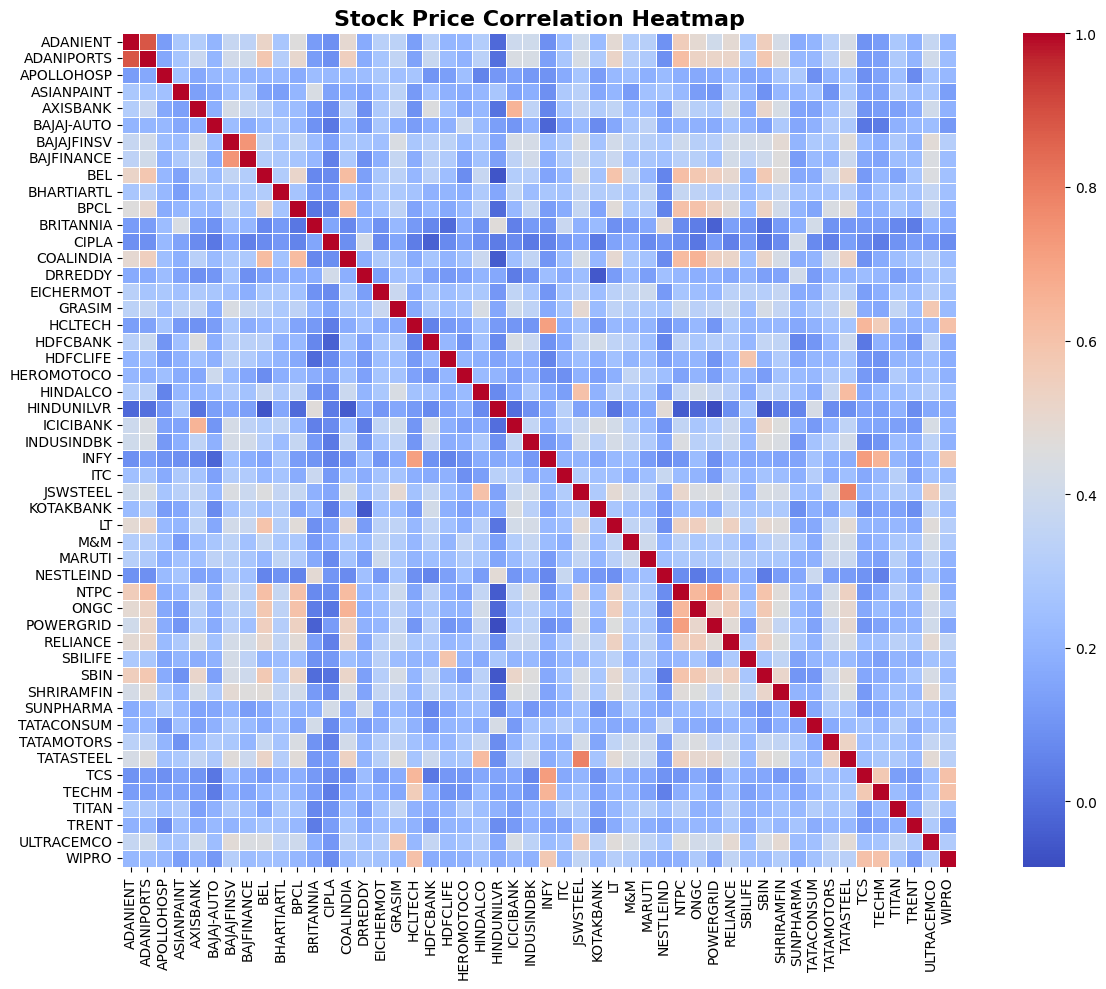

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def analyze_stock_correlation(file_paths):
    """
    Analyze correlation between stock daily returns.
    """
    stock_returns = {}
    
    for file_path in file_paths:
        try:
            ticker = os.path.basename(file_path).split('_')[0]
            
            df = pd.read_csv(file_path)
            df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
            df = df.sort_values('date')
            
            if 'close' in df.columns:
                # Daily % change
                df['daily_return'] = df['close'].pct_change()
                stock_returns[ticker] = df['daily_return'].reset_index(drop=True)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Combine into DataFrame
    returns_df = pd.DataFrame(stock_returns).dropna()
    
    # Correlation matrix
    correlation_matrix = returns_df.corr()
    
    return correlation_matrix

def plot_correlation_heatmap(correlation_matrix):
    """
    Plot heatmap of stock correlations.
    """
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, 
                cbar=True, square=True, linewidths=0.5)
    
    plt.title("Stock Price Correlation Heatmap", fontsize=16, fontweight="bold")
    plt.tight_layout()
    return plt

def generate_correlation_report(correlation_matrix, threshold=0.7):
    """
    Print report of strongly correlated stock pairs.
    """
    print("=== STOCK CORRELATION REPORT ===")
    strong_pairs = []
    for i in correlation_matrix.columns:
        for j in correlation_matrix.columns:
            if i != j:
                corr = correlation_matrix.loc[i, j]
                if corr >= threshold:
                    strong_pairs.append((i, j, corr))
    
    strong_pairs = sorted(set(tuple(sorted((a, b))) + (c,) for a, b, c in strong_pairs),
                     key=lambda x: x[2], reverse=True)
    
    if strong_pairs:
        print(f"Pairs with correlation >= {threshold}:")
        for i, j, c in strong_pairs:
            print(f"  {i} ↔ {j}: {c:.2f}")
    else:
        print(f"No pairs found with correlation >= {threshold}")
    
    return strong_pairs

# ============================
# Example usage
# ============================
file_paths = [
    'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
    # ... add all 50+ files
]

# Analyze
corr_matrix = analyze_stock_correlation(file_paths)

# Report
strong_pairs = generate_correlation_report(corr_matrix, threshold=0.7)

# Plot
plt = plot_correlation_heatmap(corr_matrix)
plt.show()


Calculating monthly returns...


C:\Users\msiva\AppData\Local\Temp\ipykernel_37164\3430567688.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['close'].resample('M').last()
C:\Users\msiva\AppData\Local\Temp\ipykernel_37164\3430567688.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['close'].resample('M').last()
C:\Users\msiva\AppData\Local\Temp\ipykernel_37164\3430567688.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['close'].resample('M').last()
C:\Users\msiva\AppData\Local\Temp\ipykernel_37164\3430567688.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['close'].resample('M').last()
C:\Users\msiva\AppData\Local\Temp\ipykernel_37164\3430567688.py:29: FutureWarning: 'M' is deprecated and will be removed in a fu

Processed data for 50 tickers
Time period: 2023-11 to 2024-11
Identifying top gainers and losers...
Available years: [2023, 2024]
Plotting data for year 2023...


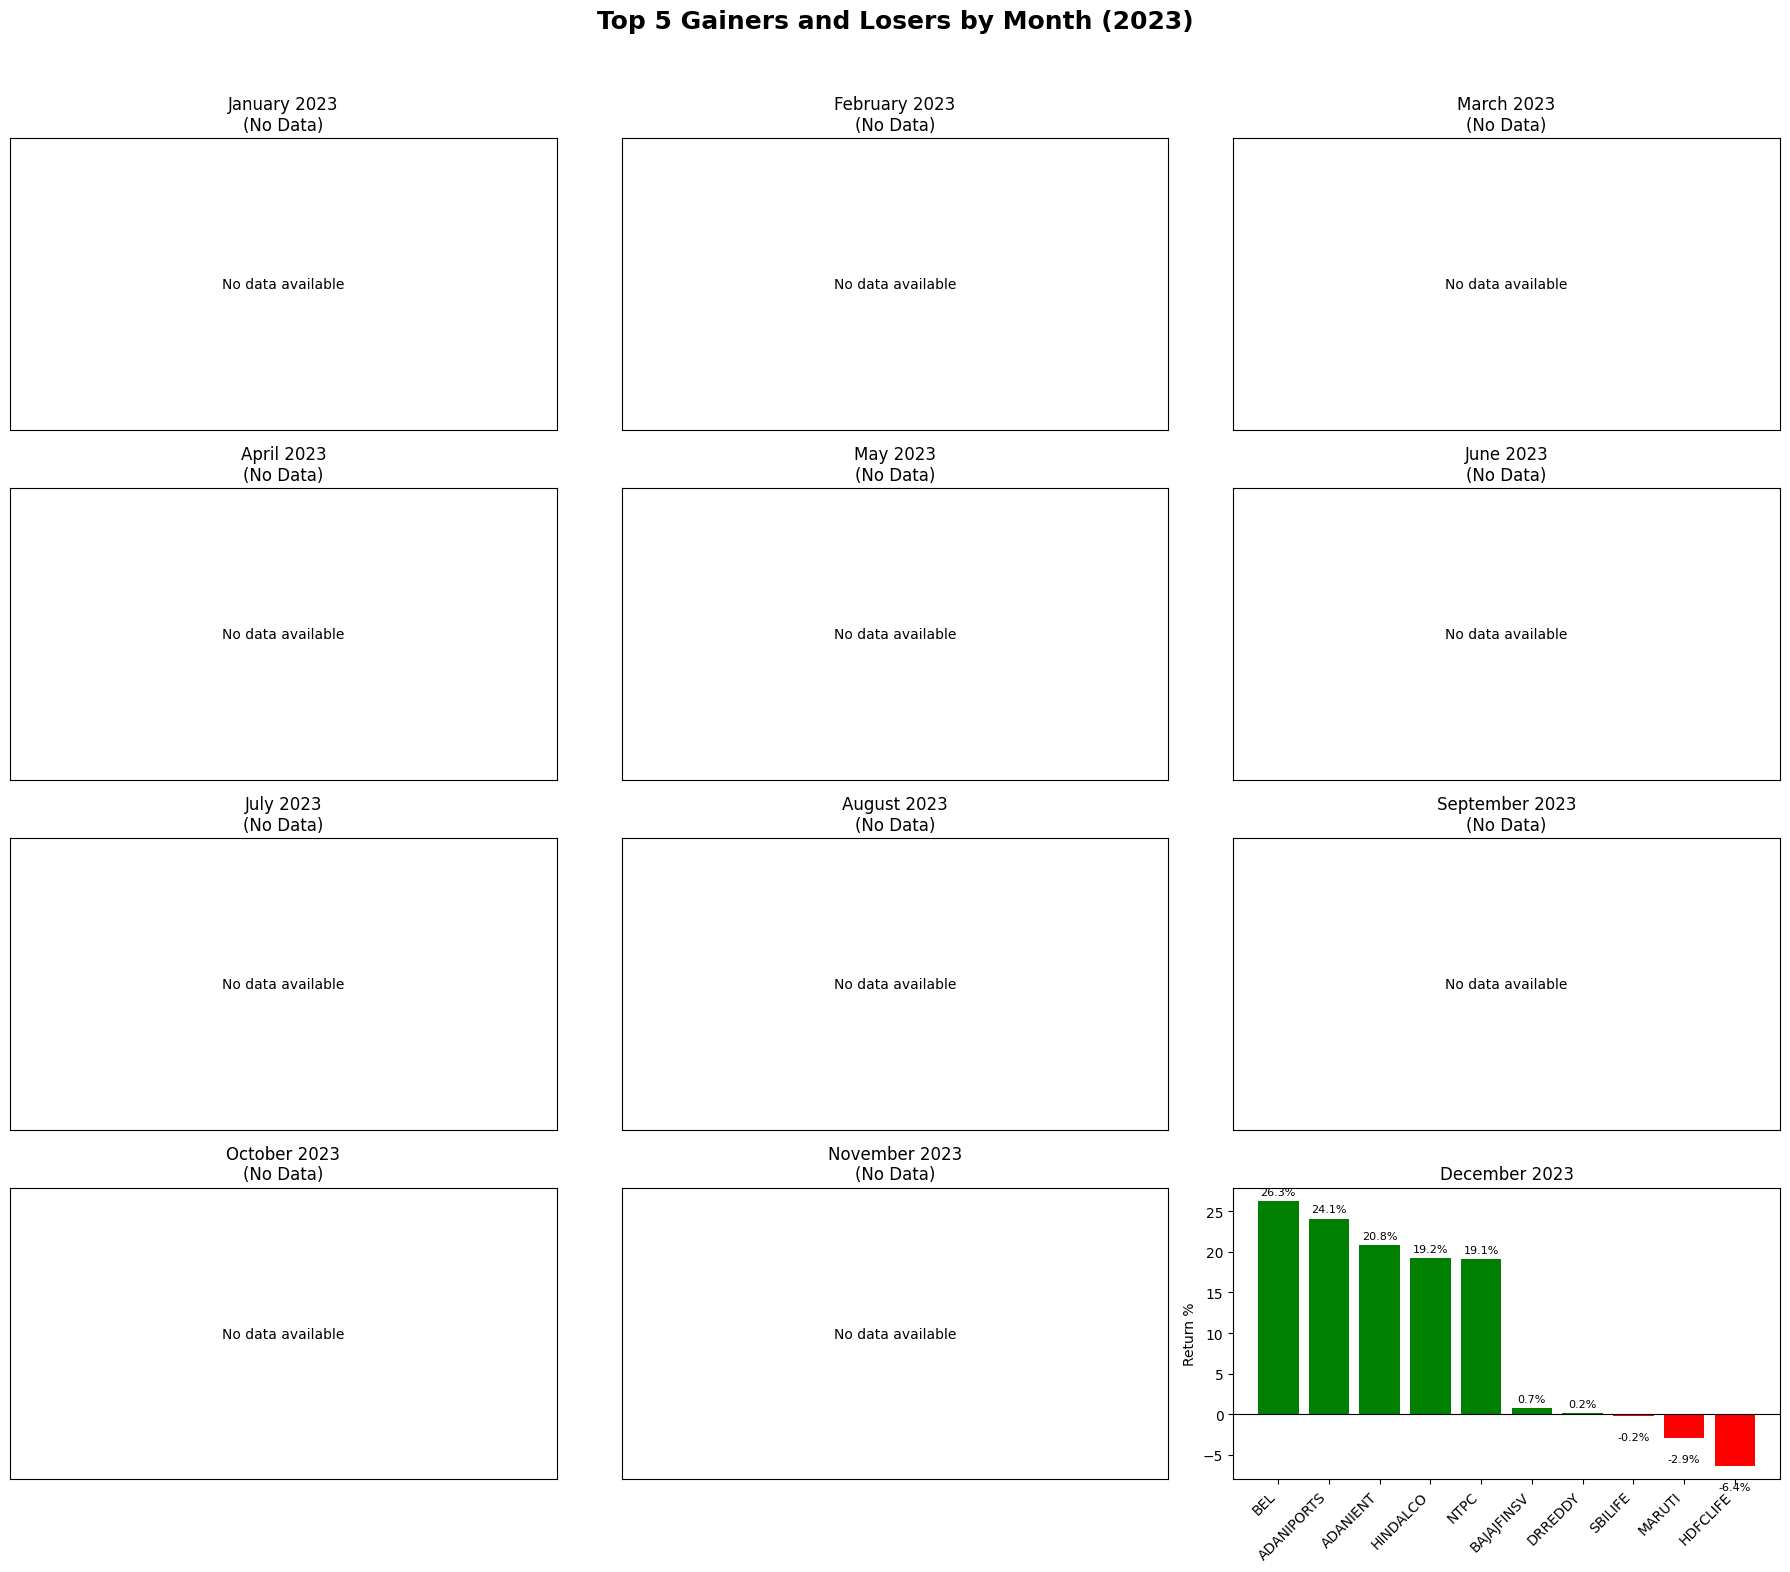

Plotting data for year 2024...


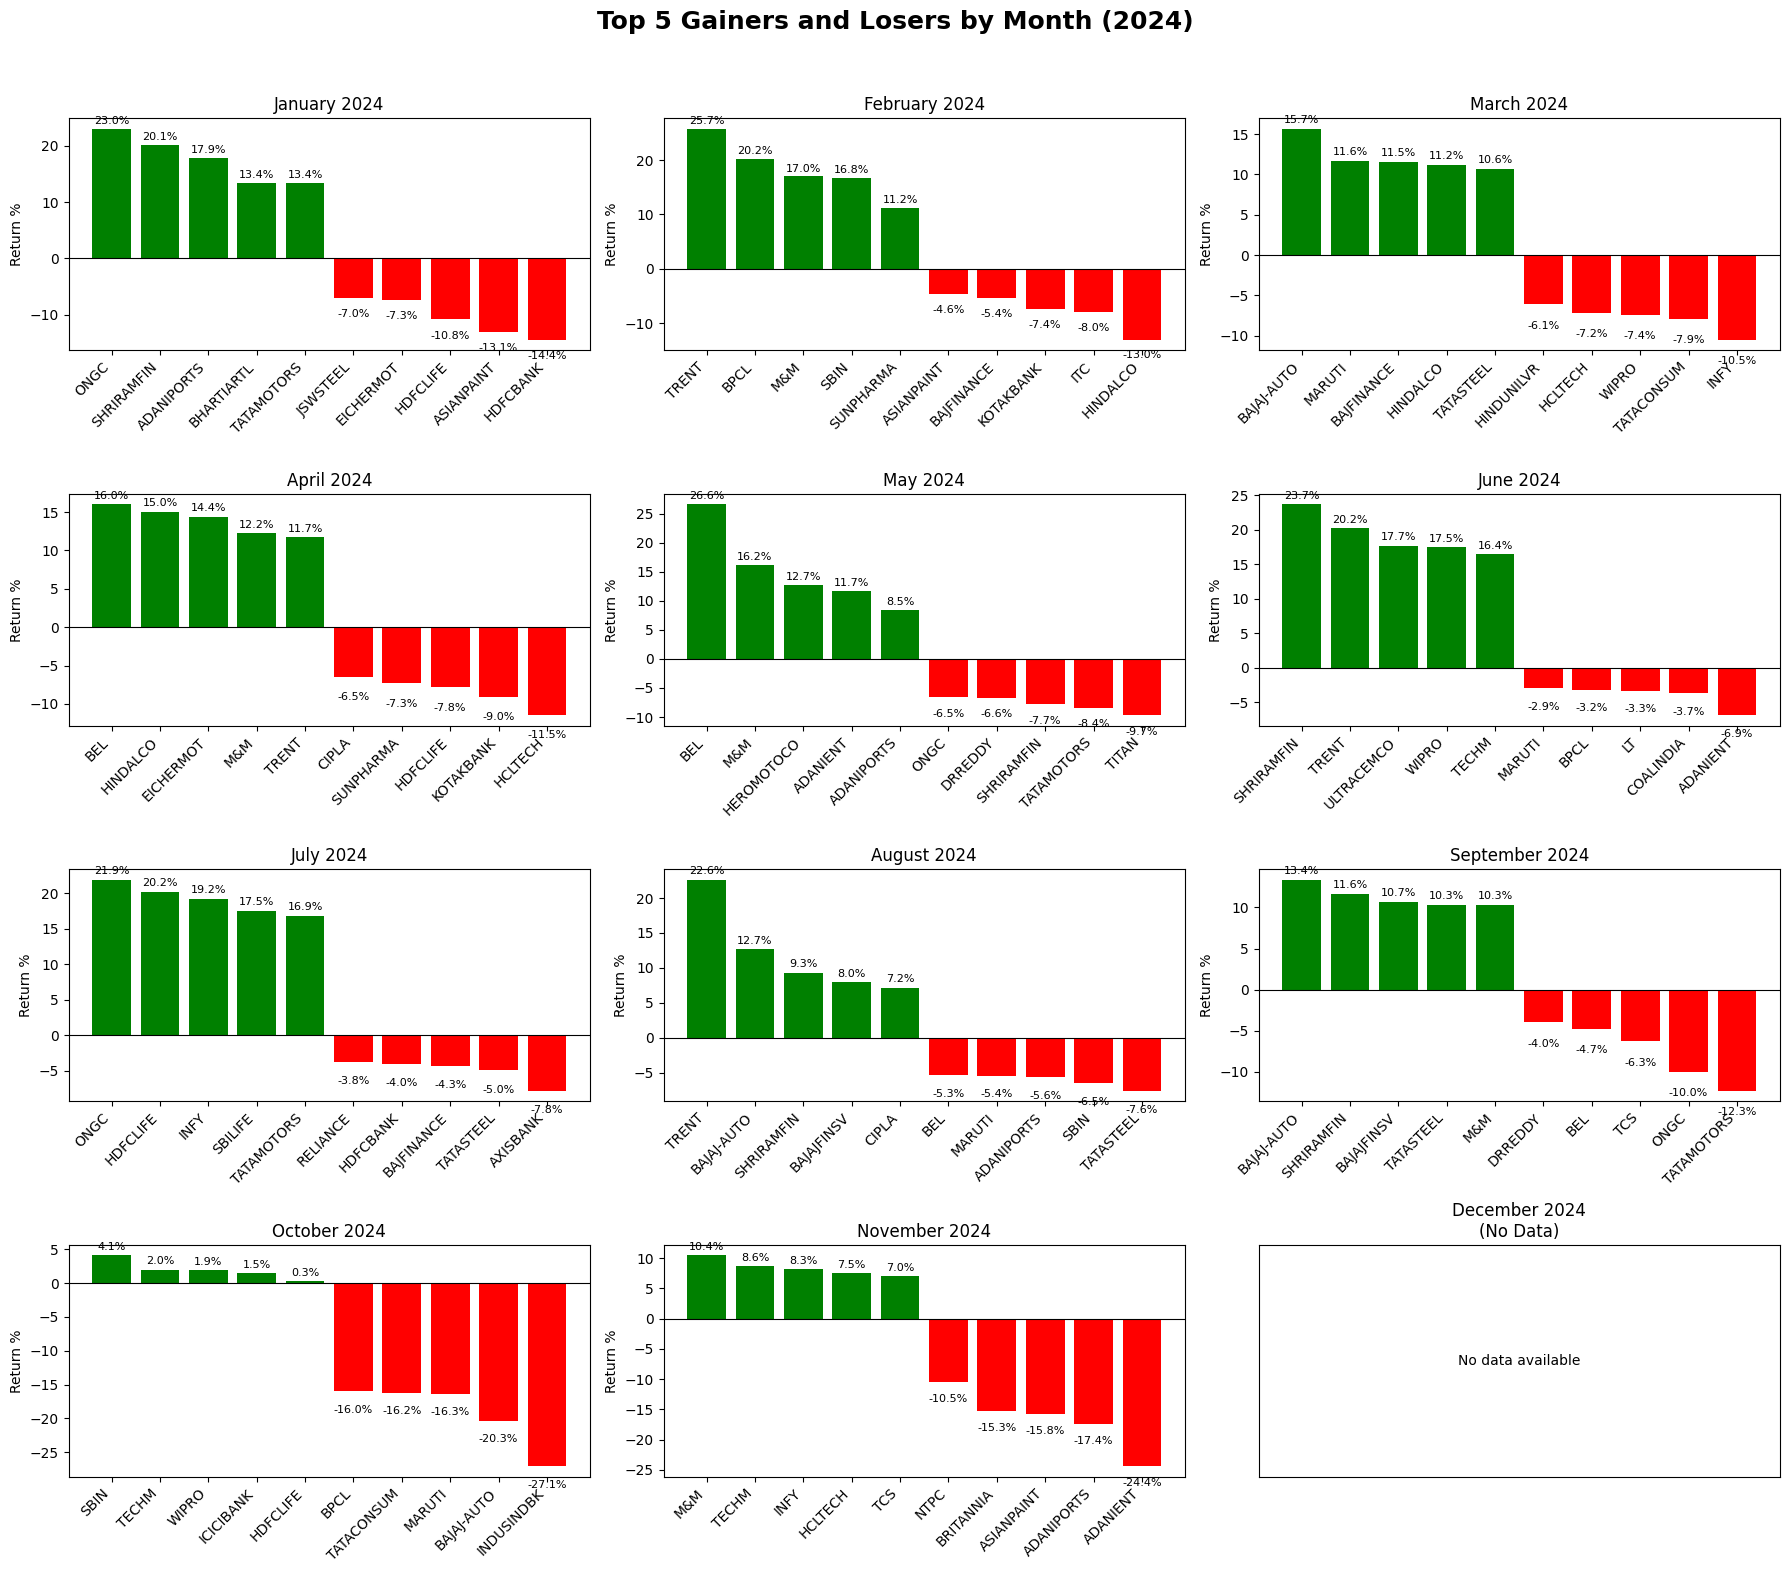

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def calculate_monthly_returns(file_paths):
    """
    Calculate monthly returns for multiple stock CSV files.
    Each CSV must contain 'date' and 'close' columns.
    """
    monthly_returns = []

    for file_path in file_paths:
        try:
            ticker = os.path.basename(file_path).split('_')[0]

            df = pd.read_csv(file_path)

            # Ensure lowercase column names
            df.columns = df.columns.str.lower()

            # Parse date safely
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            df = df.dropna(subset=['date', 'close'])
            df = df.sort_values('date')

            # Set date as index and resample to monthly frequency
            df.set_index('date', inplace=True)
            monthly_close = df['close'].resample('M').last()
            
            # Calculate monthly returns
            monthly_return = monthly_close.pct_change() * 100
            
            # Create DataFrame with proper structure
            tmp = pd.DataFrame({
                'MonthlyReturn': monthly_return
            })
            tmp['Ticker'] = ticker
            tmp['YearMonth'] = tmp.index.to_period('M')
            
            monthly_returns.append(tmp.reset_index()[['Ticker', 'YearMonth', 'MonthlyReturn']])

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    if monthly_returns:
        return pd.concat(monthly_returns, ignore_index=True)
    else:
        return pd.DataFrame(columns=['Ticker', 'YearMonth', 'MonthlyReturn'])


def get_top_gainers_losers(monthly_df, top_n=5):
    """
    For each month, get top N gainers and losers.
    """
    results = {}
    
    # Convert YearMonth to timestamp for consistency
    monthly_df['YearMonth'] = monthly_df['YearMonth'].dt.to_timestamp()
    
    for ym, group in monthly_df.groupby('YearMonth'):
        # Remove NaN returns
        group = group.dropna(subset=['MonthlyReturn'])
        
        if len(group) > 0:
            sorted_group = group.sort_values('MonthlyReturn', ascending=False)
            
            gainers = sorted_group.head(top_n).copy()
            losers = sorted_group.tail(top_n).copy()
            
            results[ym] = {
                'gainers': gainers,
                'losers': losers
            }
    
    return results


def plot_monthly_gainers_losers(results, year):
    """
    Plot 12 subplots (one for each month in given year).
    """
    months = range(1, 13)
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    year_data_exists = False
    
    for i, month in enumerate(months):
        ax = axes[i]
        try:
            # Create timestamp for the month
            ym = pd.Timestamp(year=year, month=month, day=1)
            
            if ym in results:
                year_data_exists = True
                gainers = results[ym]['gainers']
                losers = results[ym]['losers']
                
                # Combine and sort for better visualization
                combined = pd.concat([gainers, losers])
                combined = combined.sort_values('MonthlyReturn', ascending=False)
                
                # Create bar plot
                bars = ax.bar(range(len(combined)), combined['MonthlyReturn'], 
                             color=['green' if x > 0 else 'red' for x in combined['MonthlyReturn']])
                
                # Set tick labels
                ax.set_xticks(range(len(combined)))
                ax.set_xticklabels(combined['Ticker'], rotation=45, ha='right')
                
                ax.set_title(f"{ym.strftime('%B %Y')}")
                ax.set_ylabel("Return %")
                ax.axhline(0, color="black", linewidth=0.8)
                
                # Add value labels on bars
                for j, (idx, row) in enumerate(combined.iterrows()):
                    ax.text(j, row['MonthlyReturn'] + (0.5 if row['MonthlyReturn'] >= 0 else -2), 
                           f"{row['MonthlyReturn']:.1f}%", 
                           ha='center', va='bottom' if row['MonthlyReturn'] >= 0 else 'top',
                           fontsize=8)
                
            else:
                ax.set_title(f"{ym.strftime('%B %Y')}\n(No Data)")
                ax.text(0.5, 0.5, "No data available", 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_xticks([])
                ax.set_yticks([])
                
        except Exception as e:
            ax.set_title(f"Month {month} {year}\n(Error)")
            ax.text(0.5, 0.5, f"Error: {str(e)}", 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
    
    if not year_data_exists:
        print(f"No data available for year {year}")
        plt.close(fig)
        return None
    
    plt.suptitle(f"Top 5 Gainers and Losers by Month ({year})", fontsize=18, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return plt


# ============================
# Example usage
# ============================

file_paths = [    
    'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
]

# Step 1: Calculate monthly returns
print("Calculating monthly returns...")
monthly_df = calculate_monthly_returns(file_paths)

# Check if we have data
if monthly_df.empty:
    print("No data processed. Check your file paths and CSV formats.")
else:
    print(f"Processed data for {monthly_df['Ticker'].nunique()} tickers")
    print(f"Time period: {monthly_df['YearMonth'].min()} to {monthly_df['YearMonth'].max()}")

    # Step 2: Identify gainers/losers
    print("Identifying top gainers and losers...")
    results = get_top_gainers_losers(monthly_df, top_n=5)

    # Step 3: Detect available years automatically
    all_years = sorted(set(monthly_df['YearMonth'].dt.year))
    print(f"Available years: {all_years}")

    for yr in all_years:
        print(f"Plotting data for year {yr}...")
        plt = plot_monthly_gainers_losers(results, year=yr)
        if plt is not None:
            plt.show()
        else:
            print(f"Skipping year {yr} - no data available")

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read and process a single stock file
def process_stock(file_path):
    try:
        # Get stock name from filename
        ticker = os.path.basename(file_path).split('_')[0]
        
        # Read CSV
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.lower()  # make columns lowercase
        
        # Convert date and sort
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        
        # Calculate monthly returns
        df['month'] = df['date'].dt.to_period('M')
        monthly_data = df.groupby('month')['close'].last()
        monthly_returns = monthly_data.pct_change() * 100
        
        return monthly_returns.rename(ticker)
        
    except Exception as e:
        print(f"Error with {file_path}: {e}")
        return None

# Main program
def main():
    # List your stock files
    stock_files = [
        'ADANIENT_data.csv',
    'ADANIPORTS_data.csv',
    'APOLLOHOSP_data.csv',
    'ASIANPAINT_data.csv',
    'AXISBANK_data.csv',
    'BAJAJ-AUTO_data.csv',
    'BAJAJFINSV_data.csv',
    'BAJFINANCE_data.csv',
    'BEL_data.csv',
    'BHARTIARTL_data.csv',
    'BPCL_data.csv',
    'BRITANNIA_data.csv',
    'CIPLA_data.csv',
    'COALINDIA_data.csv',
    'DRREDDY_data.csv',
    'EICHERMOT_data.csv',
    'GRASIM_data.csv',
    'HCLTECH_data.csv',
    'HDFCBANK_data.csv',
    'HDFCLIFE_data.csv',
    'HEROMOTOCO_data.csv',
    'HINDALCO_data.csv',
    'HINDUNILVR_data.csv',
    'ICICIBANK_data.csv',
    'INDUSINDBK_data.csv',
    'INFY_data.csv',
    'ITC_data.csv',
    'JSWSTEEL_data.csv',
    'KOTAKBANK_data.csv',
    'LT_data.csv',
    'M&M_data.csv',
    'MARUTI_data.csv',
    'NESTLEIND_data.csv',
    'NTPC_data.csv',
    'ONGC_data.csv',
    'POWERGRID_data.csv',
    'RELIANCE_data.csv',
    'SBILIFE_data.csv',
    'SBIN_data.csv',
    'SHRIRAMFIN_data.csv',
    'SUNPHARMA_data.csv',
    'TATACONSUM_data.csv',
    'TATAMOTORS_data.csv',
    'TATASTEEL_data.csv',
    'TCS_data.csv',
    'TECHM_data.csv',
    'TITAN_data.csv',
    'TRENT_data.csv',
    'ULTRACEMCO_data.csv',
    'WIPRO_data.csv'
        # Add more files as needed
    ]
    
    # Process all stocks
    all_returns = {}
    for file in stock_files:
        returns = process_stock(file)
        if returns is not None:
            stock_name = os.path.basename(file).split('_')[0]
            all_returns[stock_name] = returns
    
    # Create DataFrame
    returns_df = pd.DataFrame(all_returns)
    
    # Analyze each month
    for month in returns_df.index:
        month_data = returns_df.loc[month].dropna()
        if len(month_data) > 0:
            sorted_returns = month_data.sort_values(ascending=False)
            
            print(f"\n{month}:")
            print("Top Gainers:")
            for stock, ret in sorted_returns.head(3).items():
                print(f"  {stock}: {ret:.1f}%")
            
            print("Top Losers:")
            for stock, ret in sorted_returns.tail(3).items():
                print(f"  {stock}: {ret:.1f}%")

# Run the program
if __name__ == "__main__":
    main()


2023-12:
Top Gainers:
  BEL: 26.3%
  ADANIPORTS: 24.1%
  ADANIENT: 20.8%
Top Losers:
  SBILIFE: -0.2%
  MARUTI: -2.9%
  HDFCLIFE: -6.4%

2024-01:
Top Gainers:
  ONGC: 23.0%
  SHRIRAMFIN: 20.1%
  ADANIPORTS: 17.9%
Top Losers:
  HDFCLIFE: -10.8%
  ASIANPAINT: -13.1%
  HDFCBANK: -14.4%

2024-02:
Top Gainers:
  TRENT: 25.7%
  BPCL: 20.2%
  M&M: 17.0%
Top Losers:
  KOTAKBANK: -7.4%
  ITC: -8.0%
  HINDALCO: -13.0%

2024-03:
Top Gainers:
  BAJAJ-AUTO: 15.7%
  MARUTI: 11.6%
  BAJFINANCE: 11.5%
Top Losers:
  WIPRO: -7.4%
  TATACONSUM: -7.9%
  INFY: -10.5%

2024-04:
Top Gainers:
  BEL: 16.0%
  HINDALCO: 15.0%
  EICHERMOT: 14.4%
Top Losers:
  HDFCLIFE: -7.8%
  KOTAKBANK: -9.0%
  HCLTECH: -11.5%

2024-05:
Top Gainers:
  BEL: 26.6%
  M&M: 16.2%
  HEROMOTOCO: 12.7%
Top Losers:
  SHRIRAMFIN: -7.7%
  TATAMOTORS: -8.4%
  TITAN: -9.7%

2024-06:
Top Gainers:
  SHRIRAMFIN: 23.7%
  TRENT: 20.2%
  ULTRACEMCO: 17.7%
Top Losers:
  LT: -3.3%
  COALINDIA: -3.7%
  ADANIENT: -6.9%

2024-07:
Top Gainers:
  ONGC: 